In [ ]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torchvision.io import read_image, ImageReadMode
import face_alignment
from aire_scripts.deform_dataloader import CustomDataset
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
from torchvision.transforms.functional import convert_image_dtype
import torch

data = CustomDataset("C:/Users/arpit/Desktop/M005_front")
data_batches = DataLoader(data, batch_size=20, shuffle=False)

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, flip_input=False, device='cuda', face_detector='blazeface')

len(data_batches)

c:\Users\arpit\.conda\envs\gaussian_splatting\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


43

In [2]:
import gc
gc.collect()

21

In [3]:
save_path = "C:/Users/arpit/Desktop/M005_front/neutral/level_1/lip_lmds"

for batch in tqdm(data_batches):
    imgs, _, _, names = batch
    imgs = convert_image_dtype(imgs, dtype=torch.uint8)
    lmds = fa.get_landmarks_from_batch(imgs)

    for name, lmd in zip(names, lmds):
        np.save(f"{save_path}/{name}.npy", np.array(lmd))

100%|██████████| 43/43 [02:43<00:00,  3.81s/it]


In [4]:
np.array(lmds).shape

(7, 68, 2)

In [5]:
import gc
gc.collect()

61096

In [ ]:
lmds

In [13]:
img, _, _, name = next(iter(data_batches))

In [14]:
img.shape

torch.Size([1, 3, 540, 960])

In [15]:
name

('neutral_level_1_001_1',)

In [ ]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import face_alignment

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, flip_input=False, device='cuda', face_detector='blazeface')

c:\Users\arpit\.conda\envs\gaussian_splatting\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from torchvision.io import read_image, ImageReadMode

input = read_image("C:/Users/arpit/Desktop/M005_front/neutral/level_1/input/001_0053.png")#, mode=ImageReadMode.RGB)

In [ ]:
# check img size

"""
from glob import glob
from PIL import Image
from tqdm import tqdm

images = []

for file in tqdm(glob("C:/Users/arpit/Desktop/input_s2/*.png")):
    image = Image.open(file).convert("RGB")
    images.append(image)
"""

 65%|██████▍   | 3053/4726 [00:31<00:17, 96.09it/s] 


KeyboardInterrupt: 

In [3]:
import sys 

sys.getsizeof(images[0].tobytes())

6220833

In [7]:
input.element_size() * input.nelement()

8294400

In [2]:
import torch.nn.functional as F

def patchify(input, patch_size):
    patches = F.unfold(input, kernel_size=patch_size, stride=patch_size).permute(0,2,1).view(-1, 3, patch_size, patch_size)
    return patches

In [34]:
import torch

patches = patchify(input.reshape(1,3, 1080, 1920).to(torch.float32), 48)

In [10]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import matplotlib.pyplot as plt

In [35]:
patches.shape

torch.Size([880, 3, 48, 48])

In [23]:
input.dtype

torch.uint8

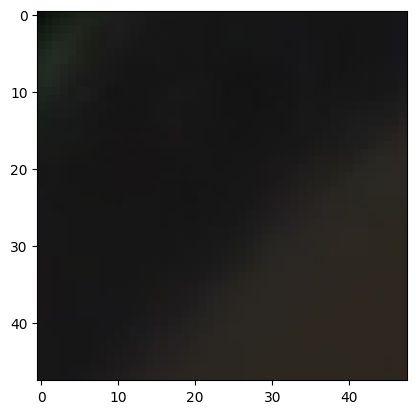

In [43]:
plt.imshow(patches[258].to(torch.uint8).permute(1,2,0))

In [44]:
import gc
gc.collect()

21

In [2]:
preds = fa.get_landmarks(input.permute(1,2,0))

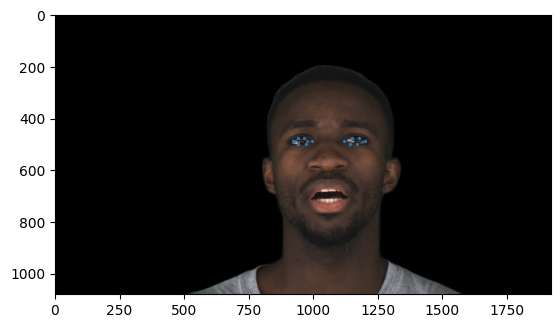

In [3]:
import matplotlib.pyplot as plt

plt.imshow(input.permute(1, 2, 0))

ids = list(range(36,48)) #+ list(range(17,27)) - 17 to 27 is for brows

plt.scatter(preds[0][36:48,0], preds[0][36:48,1], 2)

In [4]:
from PIL import Image

xs = [x for x in preds[0][ids,0]]
ys = [y for y in preds[0][ids,1]]
min_x = min(xs)
min_y = min(ys)
max_x = max(xs)
max_y = max(ys)

In [5]:
from torchvision.transforms.functional import crop, convert_image_dtype

In [6]:
cr = crop(img=input,
          top=int(min_y), left=int(min_x),
          height=int(max_y-min_y),
          width=int(max_x-min_x))

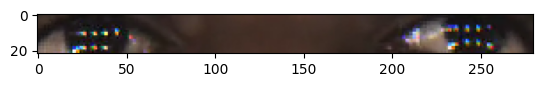

In [7]:
plt.imshow(cr.permute(1,2,0))

In [8]:
import gc
gc.collect()

45674

In [9]:
cr.shape

torch.Size([3, 22, 280])

In [25]:
import gc
gc.collect()

21